#### These days, you can personalize everything. There’s no one-size-fits-all approach. But, for business, this is actually a great thing. It creates a lot of space for healthy competition and opportunities for companies to get creative about how they acquire and retain customers.

One of the fundamental steps towards better personalization is customer segmentation. This is where personalization starts, and proper segmentation will help you make decisions regarding new features, new products, pricing, marketing strategies, even things like in-app recommendations.

But, doing segmentation manually can be exhausting. Why not employ machine learning to do it for us? In this article, I’ll tell you how to do just that.

### What is customer segmentation?

Customer segmentation simply means grouping your customers according to various characteristics (for example grouping customers by age).

It’s a way for organizations to understand their customers. Knowing the differences between customer groups, it’s easier to make strategic decisions regarding product growth and marketing.

The opportunities to segment are endless and depend mainly on how much customer data you have at your use. Starting from the basic criteria, like gender, hobby, or age, it goes all the way to things like “time spent of website X” or “time since user opened our app”. 

There are different methodologies for customer segmentation, and they depend on four types of parameters: 

- geographic, 
- demographic, 
- behavioral,
- psychological. 

Geographic customer segmentation is very simple, it’s all about the user’s location. This can be implemented in various ways. You can group by country, state, city, or zip code.

Demographic segmentation is related to the structure, size, and movements of customers over space and time. Many companies use gender differences to create and market products. Parental status is another important feature. You can obtain data like this from customer surveys.

Behavioral customer segmentation is based on past observed behaviors of customers that can be used to predict future actions. For example, brands that customers purchase, or moments when they buy the most. The behavioral aspect of customer segmentation not only tries to understand reasons for purchase but also how those reasons change throughout the year.

Psychological segmentation of customers generally deals with things like personality traits, attitudes, or beliefs. This data is obtained using customer surveys, and it can be used to gauge customer sentiment.

### Advantages of customer segmentation
Implementing customer segmentation leads to plenty of new business opportunities. You can do a lot of optimization in:

- budgeting, 
- product design, 
- promotion, 
- marketing, 
- customer satisfaction. 

Let’s discuss these benefits in more depth.

Budgeting
Nobody likes to invest in campaigns that don’t generate any new customers. Most companies don’t have huge marketing budgets, so that money has to be spent right. Segmentation enables you to target customers with the highest potential value first, so you get the most out of your marketing budget. 

Product design
Customer segmentation helps you understand what your users need. You can identify the most active users/customers, and optimize your application/offer towards their needs. 

Promotion
Properly implemented customer segmentation helps you plan special offers and deals. Frequent deals have become a staple of e-commerce and commercial software in the past few years. If you reach a customer with just the right offer, at the right time, there’s a huge chance they’re going to buy. Customer segmentation will help you tailor your special offers perfectly.

Marketing
The marketing strategy can be directly improved with segmentation because you can plan personalized marketing campaigns for different customer segments, using the channels that they use the most.

Customer satisfaction
By studying different customer groups, you learn what they value the most about your company. This information will help you create personalized products and services that perfectly fit your customers’ preferences.

### Machine Learning for customer segmentation
Machine learning methodologies are a great tool for analyzing customer data and finding insights and patterns. Artificially intelligent models are powerful tools for decision-makers. They can precisely identify customer segments, which is much harder to do manually or with conventional analytical methods.

There are many machine learning algorithms, each suitable for a specific type of problem. One very common machine learning algorithm that’s suitable for customer segmentation problems is the k-means clustering algorithm. There are other clustering algorithms as well such as DBSCAN, Agglomerative Clustering, and BIRCH, etc.

#### Why would you implement machine learning for customer segmentation?

More time
Manual customer segmentation is time-consuming. It takes months, even years to analyze piles of data and find patterns manually.  Also if done heuristically, it may not have the accuracy to be useful as expected.

Customer segmentation used to be done manually and wasn’t too precise. You’d manually create and populating different data tables, and analyze the data like a detective with a looking glass. Now, it’s much better (and relatively easy thanks to rapid progress in ML) to just use machine learning, which can free up your time to focus on more demanding problems that require creativity to solve.

Ease of retraining
Customer Segmentation is not a “develop once and use forever” type of project. Data is ever-changing, trends oscillate, everything keeps changing after your model is deployed. Usually, more labeled data becomes available after development, and it’s a great resource for improving the overall performance of your model. 

There are many ways to update customer segmentation models, but here are the two main approaches:

Use the old model as the starting point and retrain it.
Keep the existing model and combine its output with a new model.
Better scaling 
Machine learning models deployed in production support scalability, thanks to cloud infrastructure. These models are quite flexible for future changes and feedback. For example, consider a company that has 10000 customers today, and they’ve implemented a customer segmentation model. After a year, if the company has 1 million customers, then ideally we don’t need to create a separate project to handle this increased data. Machine Learning models have the inherent capability to handle more data and scale in production.

Higher accuracy
The value of an optimal number of clusters for given customer data is easy to find using machine learning methods like the elbow method. Not only the optimal number of clusters but also the performance of the model is far better when we use machine learning.

In [22]:
# installation of required library
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
# installation of required library
pip install openpyxl

### Importing relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

C:\Users\gudal\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Loading Dataset

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Interpreting the content of the dataset

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Feature Extraction

In [8]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [9]:
df['Invoice_Year'] = df.InvoiceDate.dt.year
df['Invoice_Month'] = df.InvoiceDate.dt.month
df['Invoice_Day'] = df.InvoiceDate.dt.day
df['Invoice_WeekDay'] = df.InvoiceDate.dt.weekday
df['Total Price'] = df.Quantity * df.UnitPrice

Customer ID is a unique identifier for each customer so it won't have any significance as far as clustering is concerned.

### Feature Preparation

In [10]:
df = df[(df.Quantity>0) & (df.UnitPrice>0)]
df.shape

(530104, 13)

In [12]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34


In [11]:
X = df.drop(['InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)

### Categorical Encoding

In [13]:
encoder = LabelEncoder()
X.Description = encoder.fit_transform(X.Description.astype(str))
X.Description = X.Description.astype(np.int64)

### Outlier Treatment

In [14]:
for col in X.columns:
    if X[col].dtypes != object:
        lower_limit, upper_limit = X[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        index = X[(X[col]<lower_whisker) & (X[col]>upper_whisker)].index
        X.drop(index,inplace=True)

### EDA (Exploratory Data Analysis)

<AxesSubplot:>

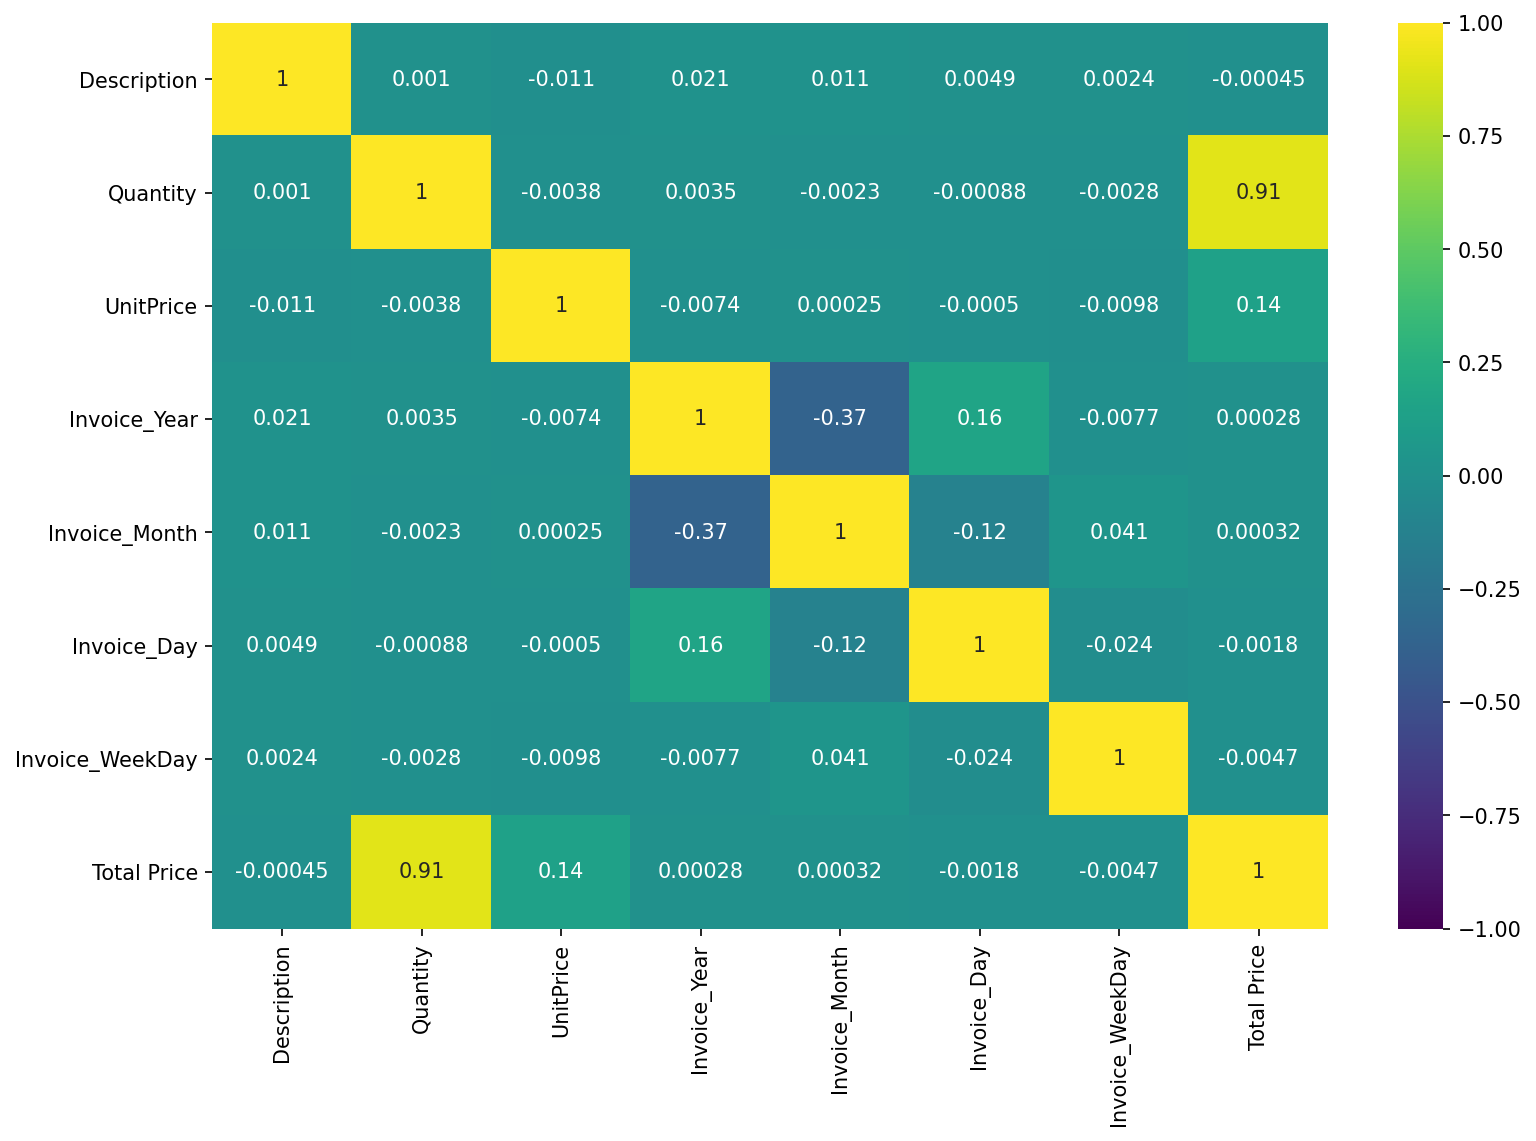

In [15]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

<AxesSubplot:xlabel='Quantity', ylabel='Total Price'>

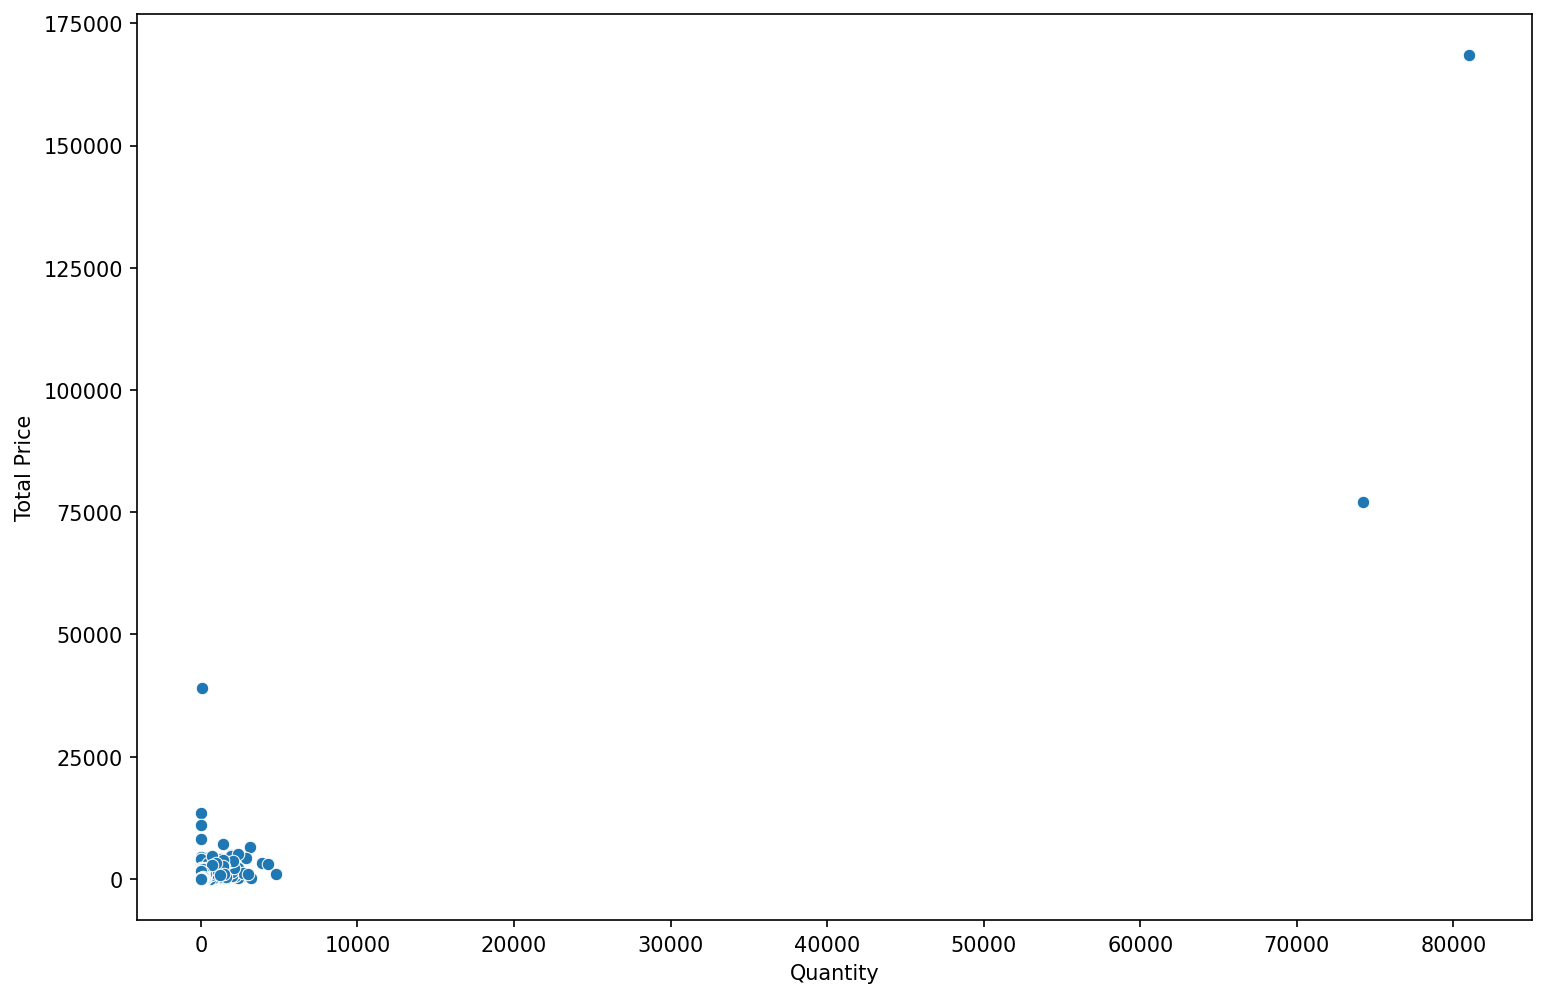

In [16]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=X,x='Quantity',y='Total Price')

In [17]:
X.describe()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price
count,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,2080.782282,10.542037,3.907625,2010.921751,7.560611,15.020922,2.436626,20.121871
std,1127.280809,155.524124,35.915681,0.268563,3.508496,8.661560,1.850651,270.356743
min,0.000000,1.000000,0.001000,2010.000000,1.000000,1.000000,0.000000,0.001000
25%,1166.000000,1.000000,1.250000,2011.000000,5.000000,7.000000,1.000000,3.750000
50%,2038.000000,3.000000,2.080000,2011.000000,8.000000,15.000000,2.000000,9.900000
75%,3062.000000,10.000000,4.130000,2011.000000,11.000000,22.000000,4.000000,17.700000
max,4025.000000,80995.000000,13541.330000,2011.000000,12.000000,31.000000,6.000000,168469.600000


<AxesSubplot:xlabel='Invoice_Year'>

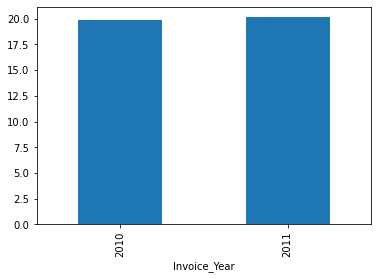

In [18]:
X.groupby('Invoice_Year')['Total Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Invoice_Year', ylabel='count'>

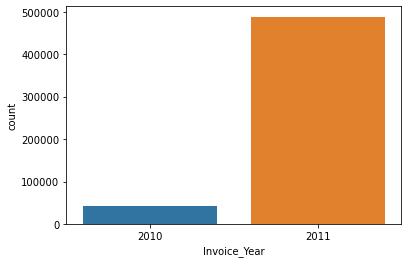

In [19]:
sns.countplot(X.Invoice_Year)

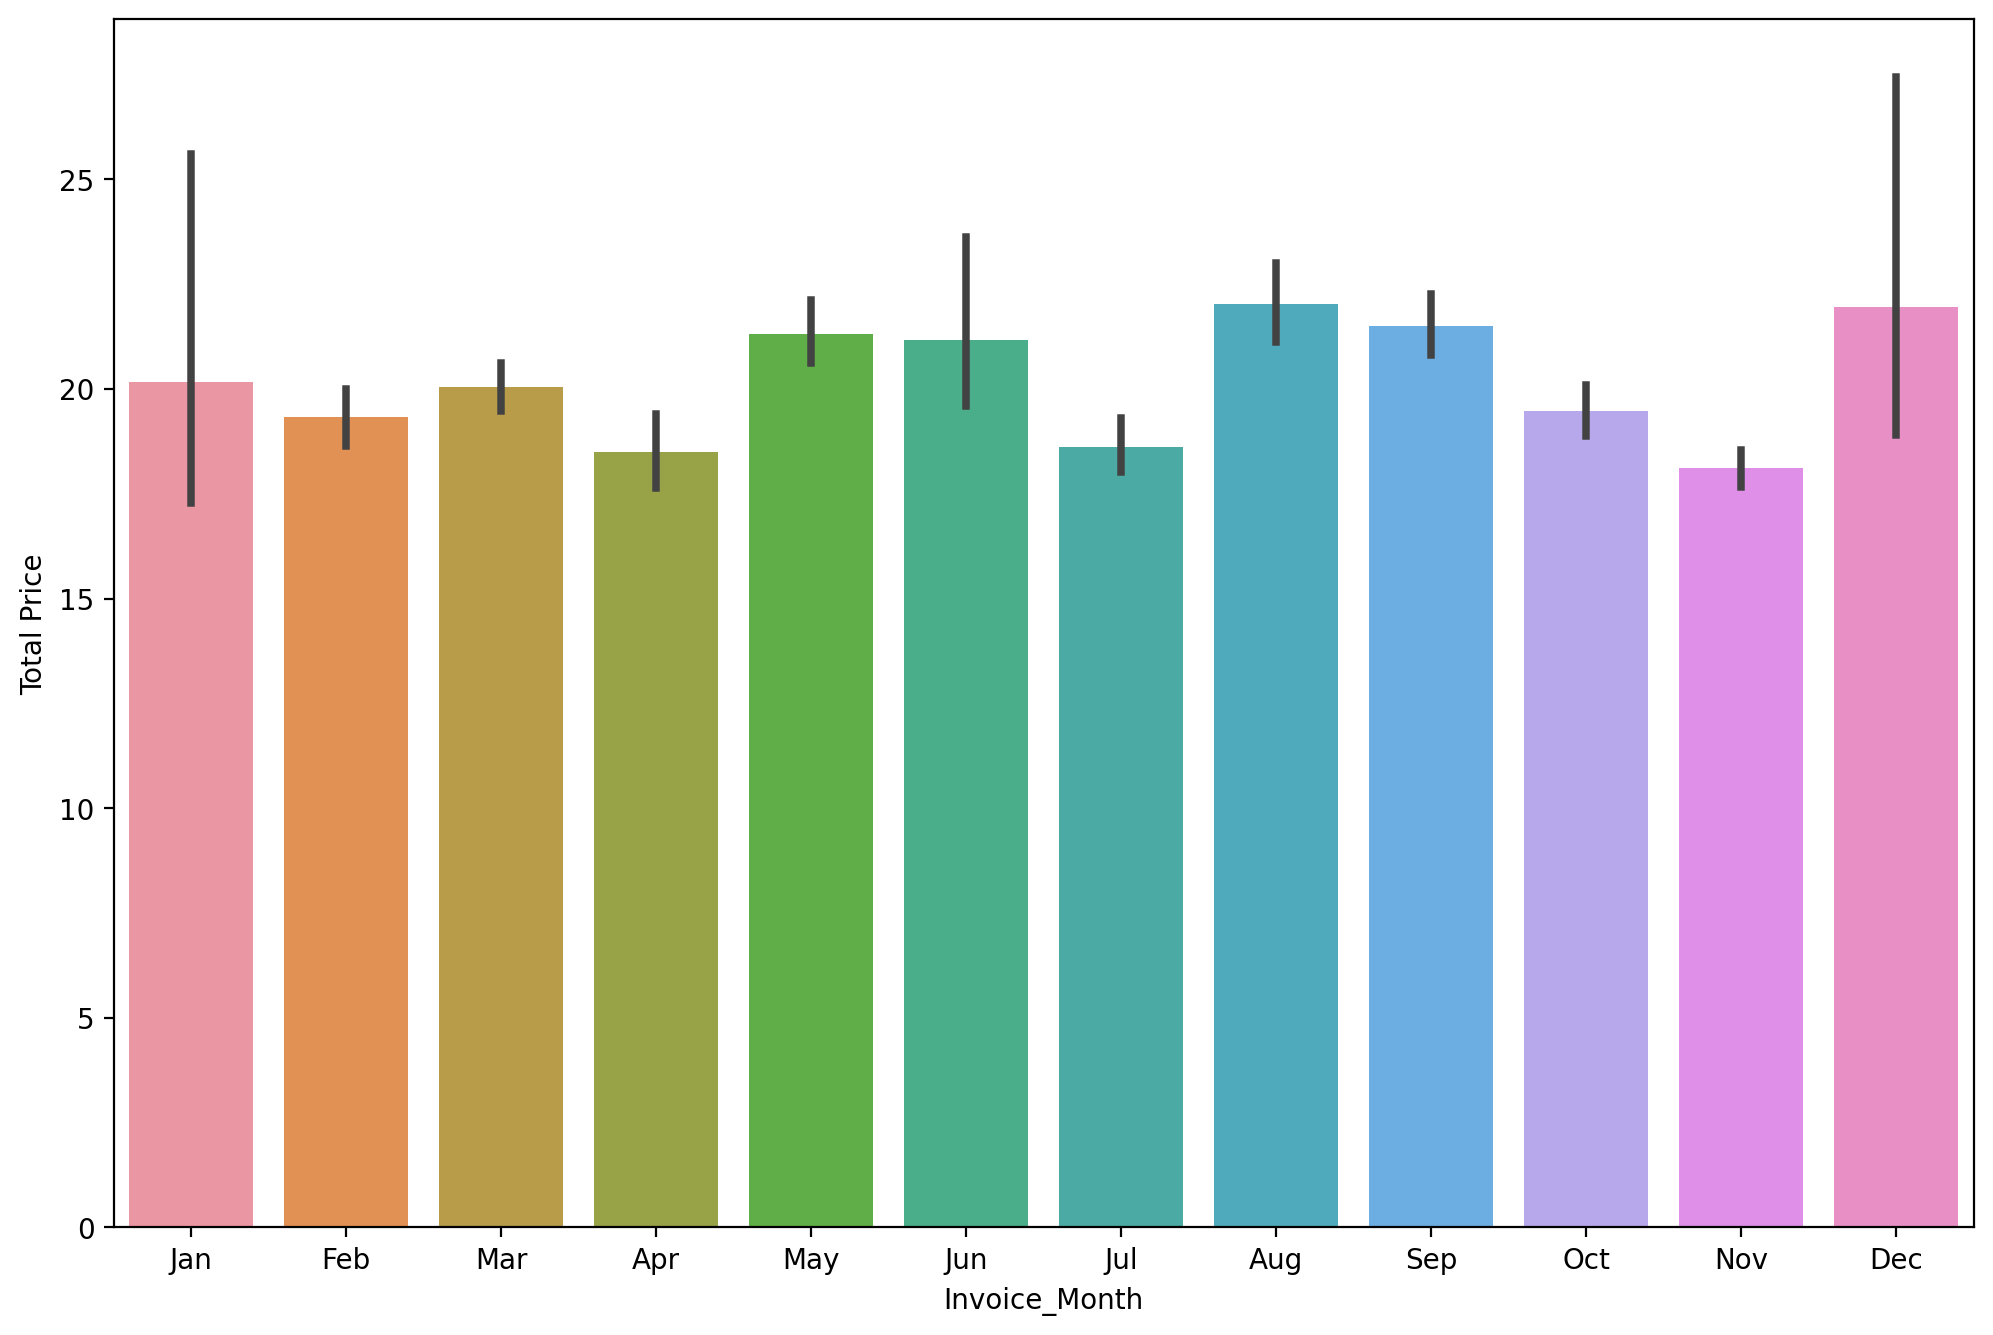

In [20]:
plt.figure(figsize=(12,8),dpi=200)
ax = sns.barplot(data=X,x='Invoice_Month',y='Total Price')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

<AxesSubplot:xlabel='Invoice_Day', ylabel='Total Price'>

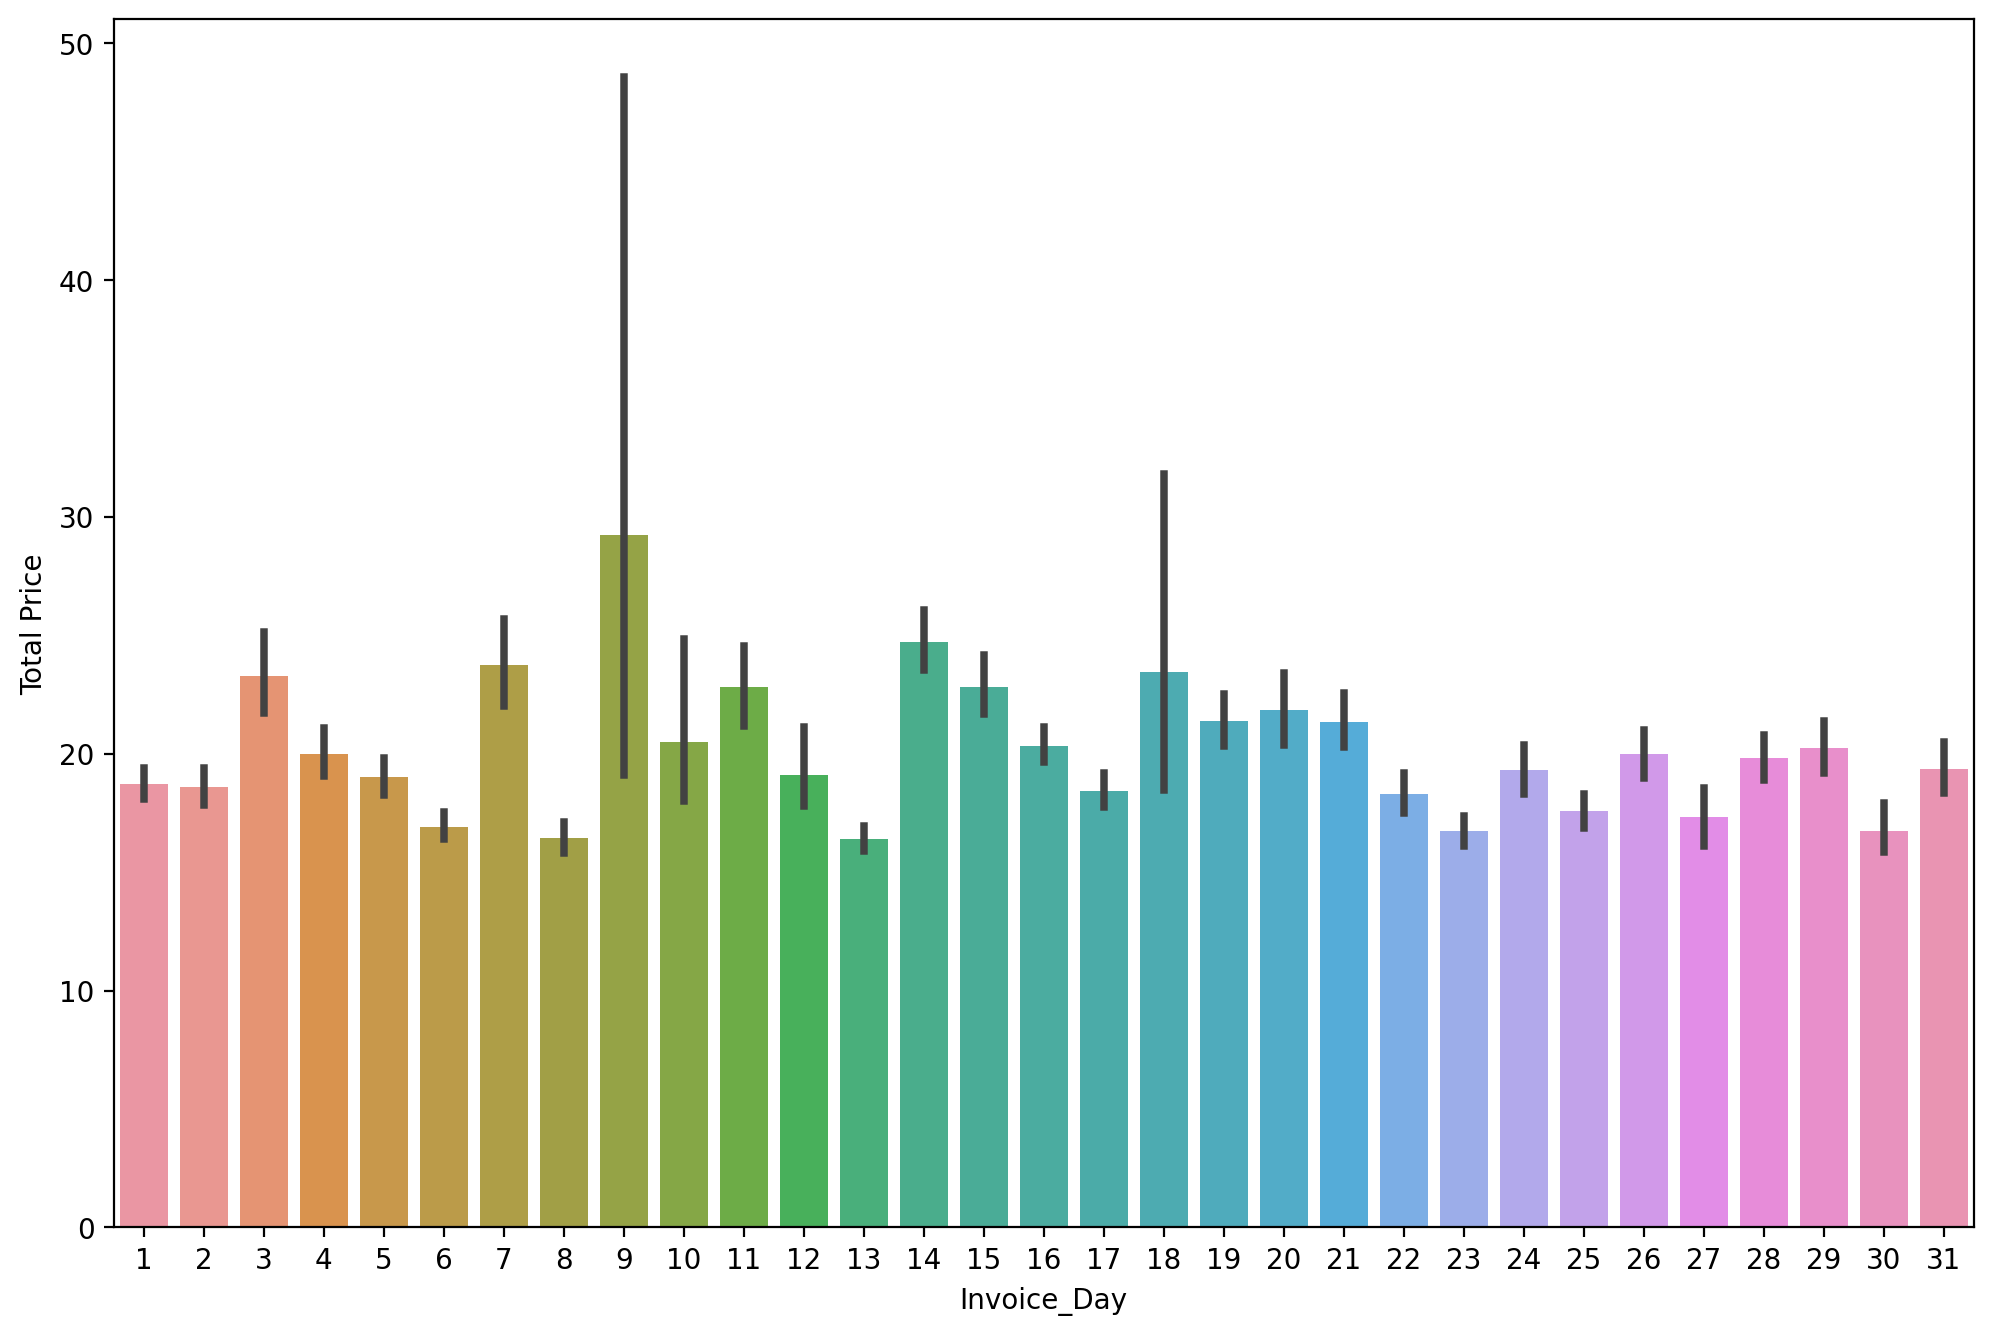

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=X,x='Invoice_Day',y='Total Price')

### Univariate Analysis

Skewness of Quantity: 471.7277163313442
Kurtosis of Quantity: 236462.34282634672


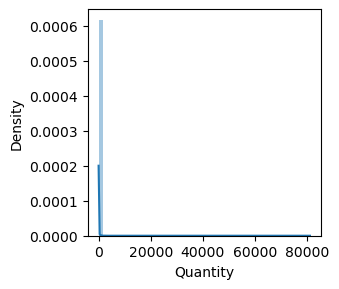

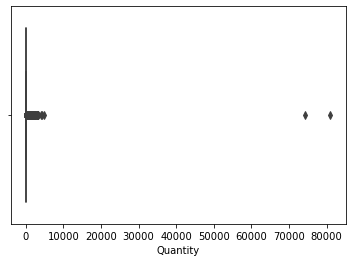

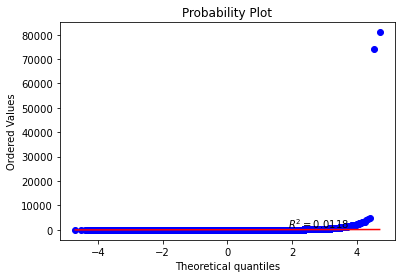

Skewness of UnitPrice: 206.08755495006463
Kurtosis of UnitPrice: 62483.14271510476


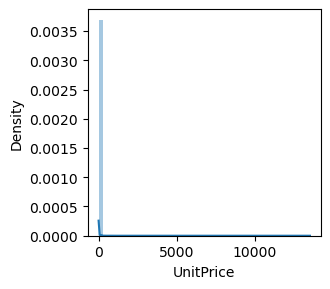

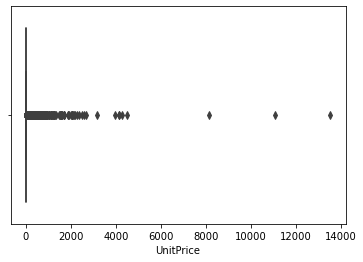

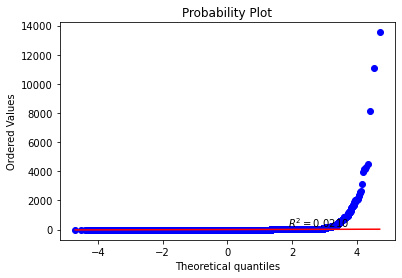

Skewness of Invoice_Year: -3.140811448329451
Kurtosis of Invoice_Year: 7.8647262263308715


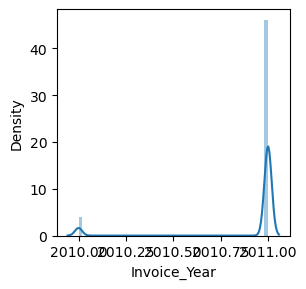

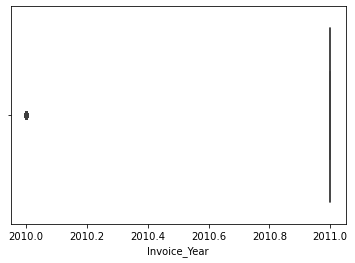

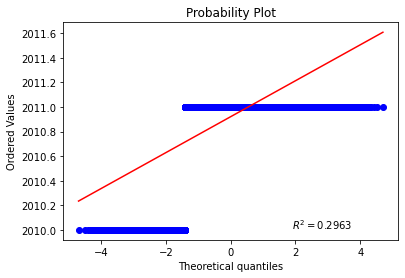

Skewness of Invoice_Month: -0.41841228696053556
Kurtosis of Invoice_Month: -1.1169946588288


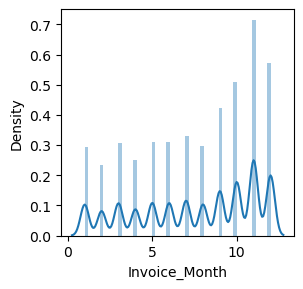

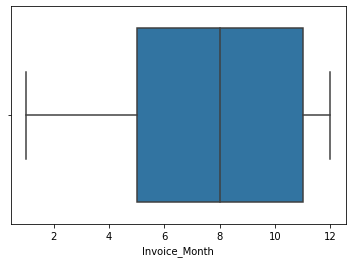

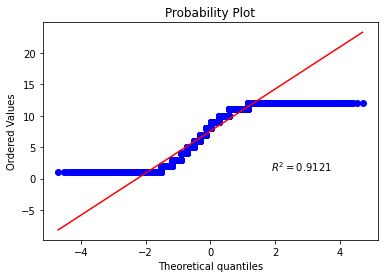

Skewness of Invoice_Day: 0.14208619030549433
Kurtosis of Invoice_Day: -1.1574107092128816


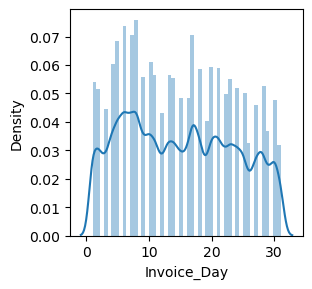

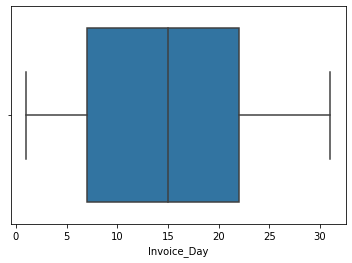

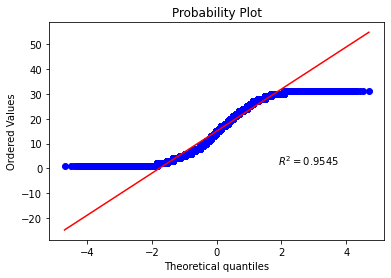

Skewness of Invoice_WeekDay: 0.4661824816962572
Kurtosis of Invoice_WeekDay: -0.6675789760994388


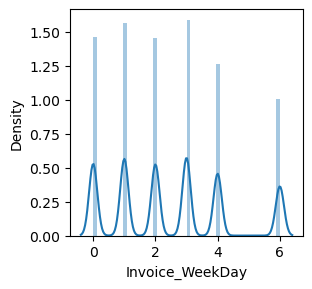

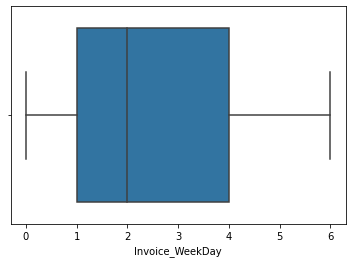

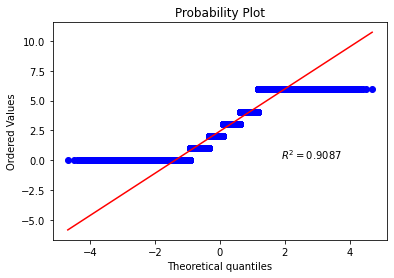

Skewness of Total Price: 506.7060119422723
Kurtosis of Total Price: 297651.6610458157


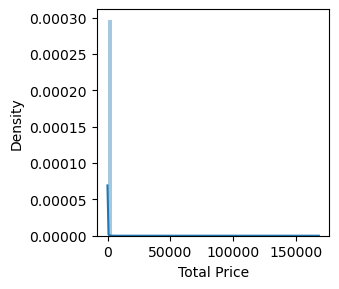

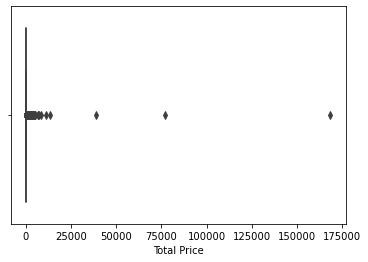

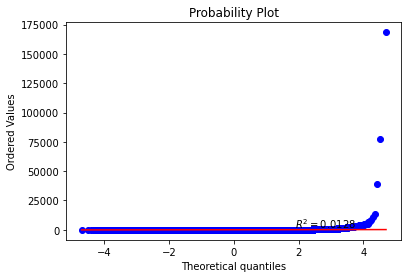

In [22]:
for col in X.columns:
    if col not in ['Description','InvoiceYear']:
        if X[col].dtypes != object:
            print("Skewness of {}:".format(col),X[col].skew())
            print("Kurtosis of {}:".format(col),X[col].kurt())
            plt.figure(figsize=(3,3),dpi=100)
            sns.distplot(X[col])
            plt.show()
            sns.boxplot(data=X,x=col)
            plt.show()
            scipy.stats.probplot(X[col],plot=plt,rvalue=True)
            plt.show()

#### Skewness
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail. If the data are multi-modal, then this may affect the sign of the skewness.

#### Kurtosis
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

The kurtosis for a standard normal distribution is three. This definition is used so that the standard normal distribution has a kurtosis of zero. In addition, with the second definition positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.


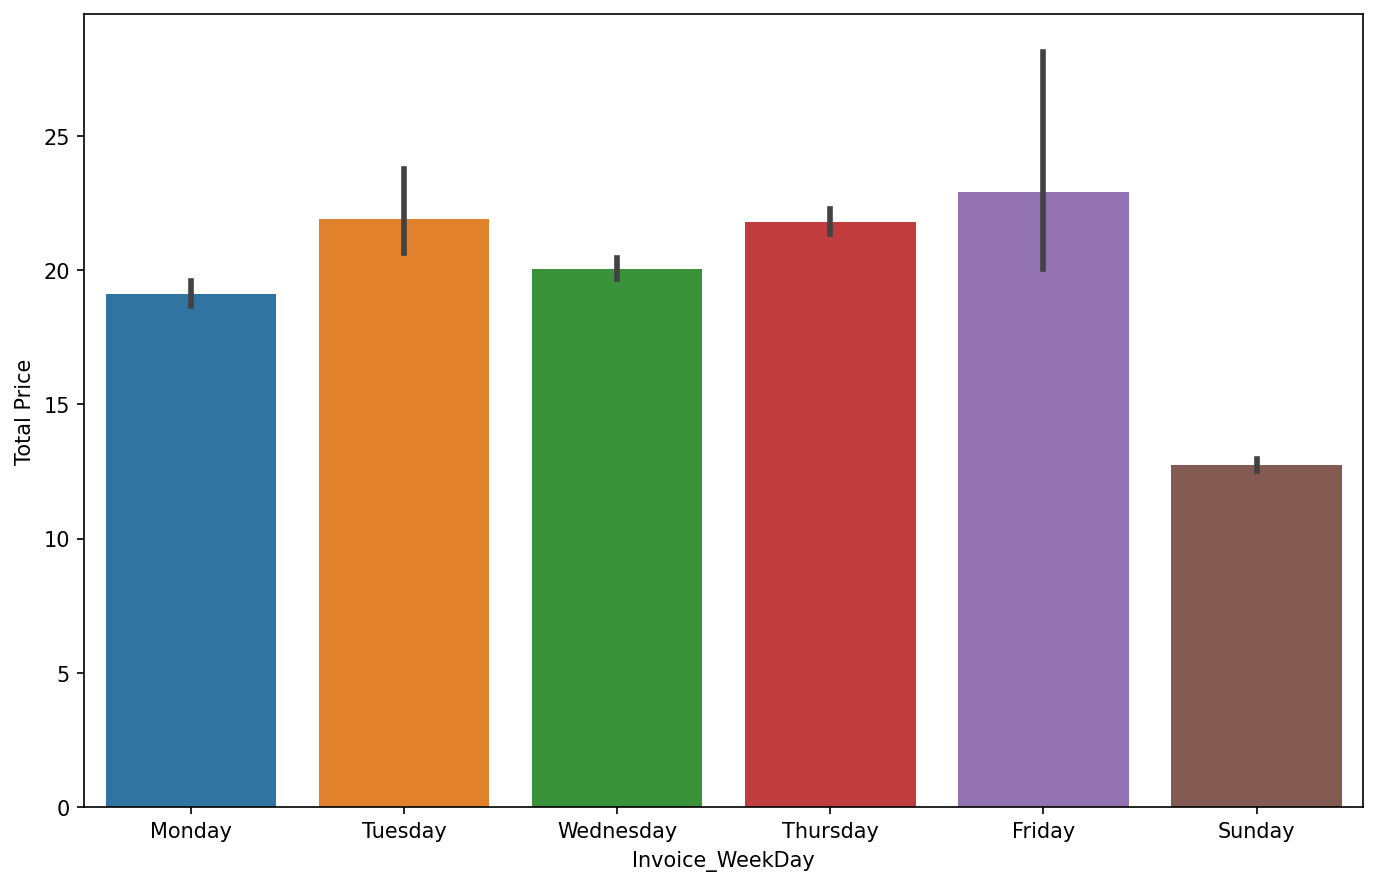

In [23]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Total Price')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']);

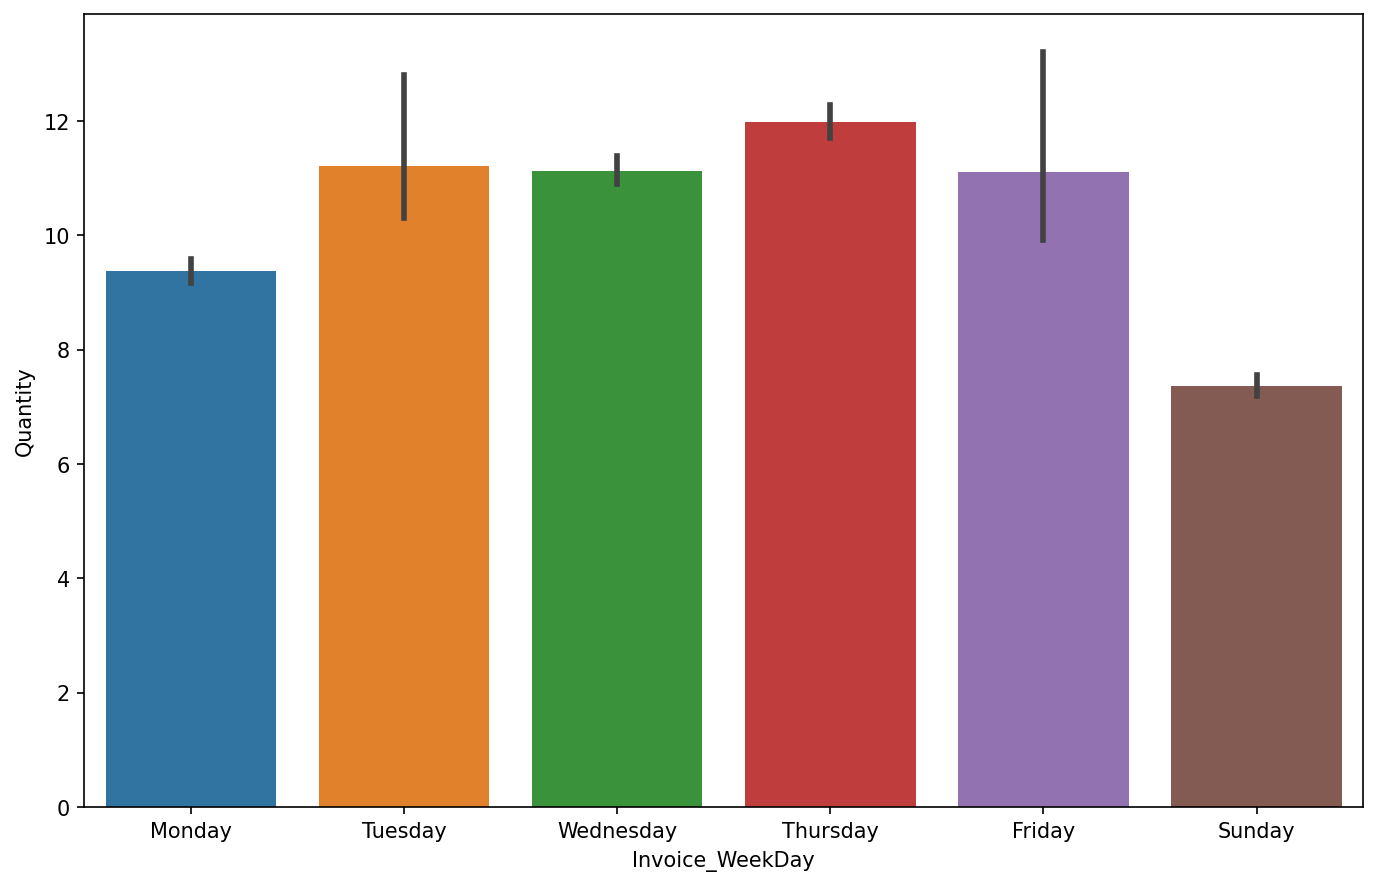

In [24]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Quantity')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']);

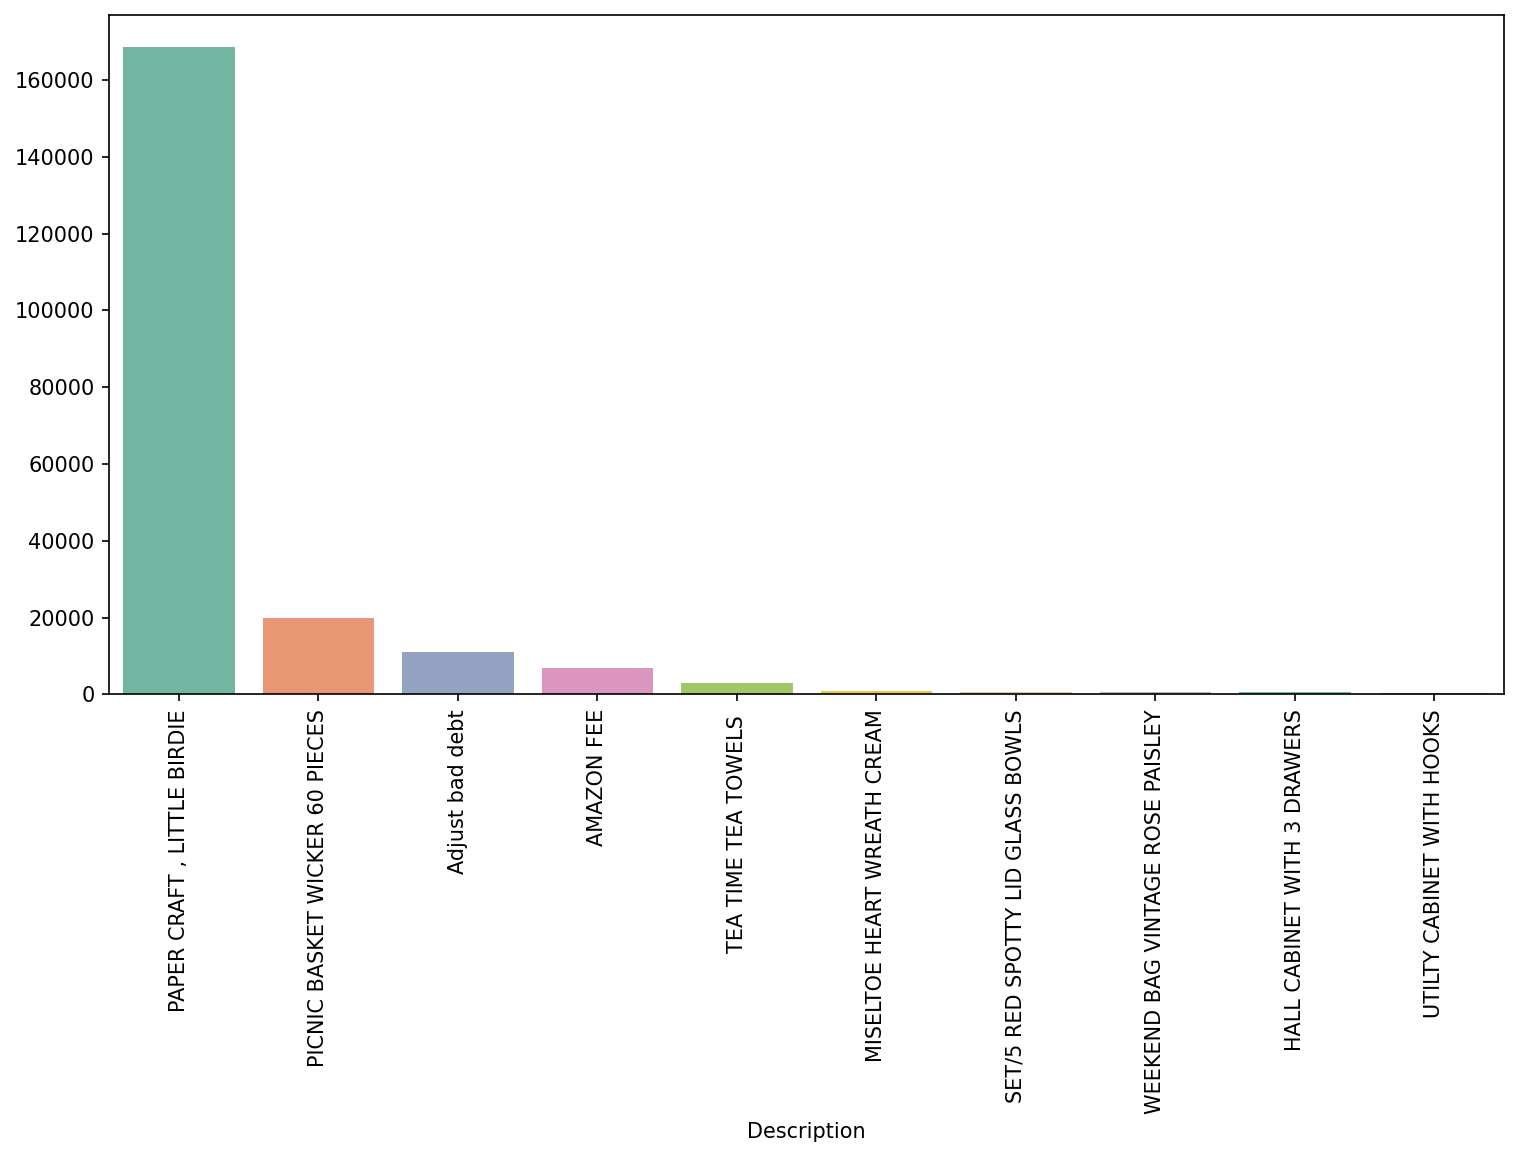

In [25]:
plt.figure(figsize=(12,6),dpi=150)
sns.barplot(df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].index,df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].values,palette='Set2')
plt.xticks(rotation=90);

### Feature Engineering Continuation

In [26]:
X = pd.get_dummies(X)
X.head()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,3844,6,2.55,2010,12,1,2,15.30,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3852,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
2,888,8,2.75,2010,12,1,2,22.00,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1859,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2849,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature Scaling

In [27]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X.head()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,1.564135,-0.029205,-0.037800,-3.432164,1.265327,-1.618754,-0.235931,-0.017835,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
1,1.571232,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
2,-1.058107,-0.016345,-0.032232,-3.432164,1.265327,-1.618754,-0.235931,0.006947,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
3,-0.196741,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
4,0.681479,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018


In [28]:
scaled_X.drop('Invoice_Year',axis=1,inplace=True)
X.drop('Invoice_Year',axis=1,inplace=True)

### Model Training & Assessment

In [29]:
kmeans_model = KMeans()
cluster_labels = kmeans_model.fit_predict(scaled_X)
cluster_labels

array([6, 6, 6, ..., 4, 4, 4])

In [30]:
ssd = []

for i in range(2,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_X)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

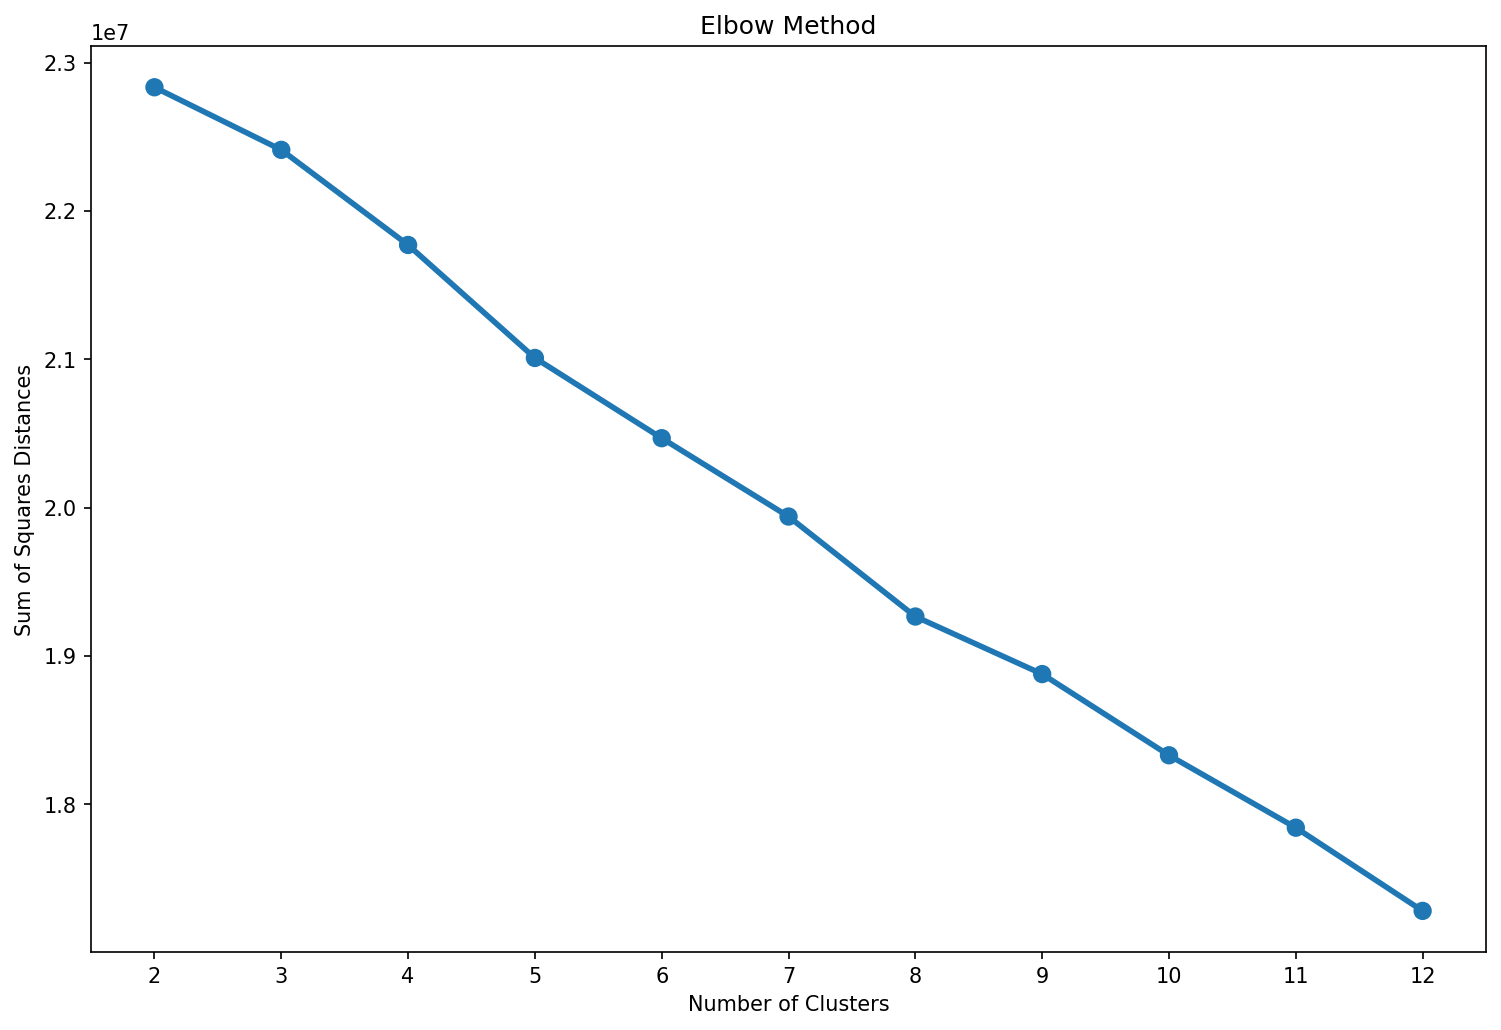

In [31]:
plt.figure(figsize=(12,8),dpi=150)
sns.pointplot(np.arange(2,13),ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')

In [32]:
model = KMeans(n_clusters=12,random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=12, random_state=101)

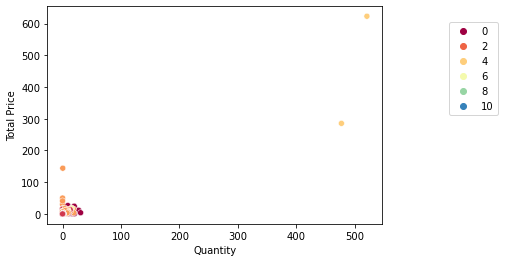

In [33]:
sns.scatterplot(data=scaled_X,x='Quantity',y='Total Price',hue=model.labels_,palette='Spectral')
plt.legend(loc=(1.2,0.5))

In [34]:
scaled_X['Segment'] = model.labels_
X['Segment'] = model.labels_

<AxesSubplot:xlabel='Segment'>

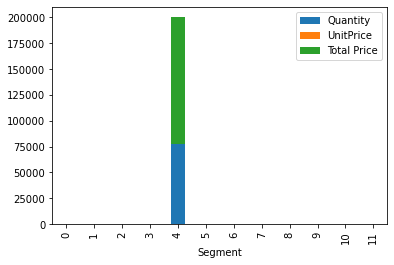

In [35]:
X.groupby('Segment')[['Quantity','UnitPrice','Total Price']].mean().plot(kind='bar',stacked=True)

In [36]:
temp = scaled_X.sample(n=15000)
silhouette_score(temp,temp.Segment)

0.4216538450209038

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The value 1 means clusters are well apart from each other and clearly distinguished. The worst value is -1. Values near 0 denote overlapping clusters.

### Density-based Spatial Clustering of Applications with Noise(DBSCAN)

In [37]:
temp = scaled_X.sample(n=10000)

In [38]:
dbscan = DBSCAN()
dbscan.fit(temp)

DBSCAN()

In [39]:
percent_outliers = []
min_samples = 2 * temp.shape[1]

for eps in np.linspace(0.001,5,50):
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(temp)
    percent_outliers.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

Text(0, 0.5, 'Percentage of Outliers')

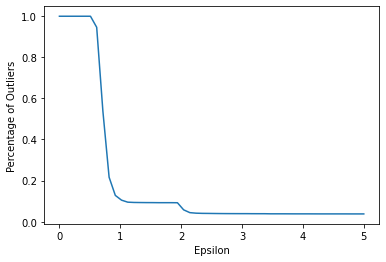

In [40]:
sns.lineplot(np.linspace(0.001,5,50),percent_outliers)
plt.xlabel('Epsilon')
plt.ylabel('Percentage of Outliers')

### Optimized DBSCAN Model

In [47]:
silhouette_scores = []

for i in np.linspace(1.5,5,50):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(temp)
    temp['Segment'] = dbscan.labels_
    silhouette_scores.append(silhouette_score(temp,temp.Segment))

Text(0, 0.5, 'Silhouette Score')

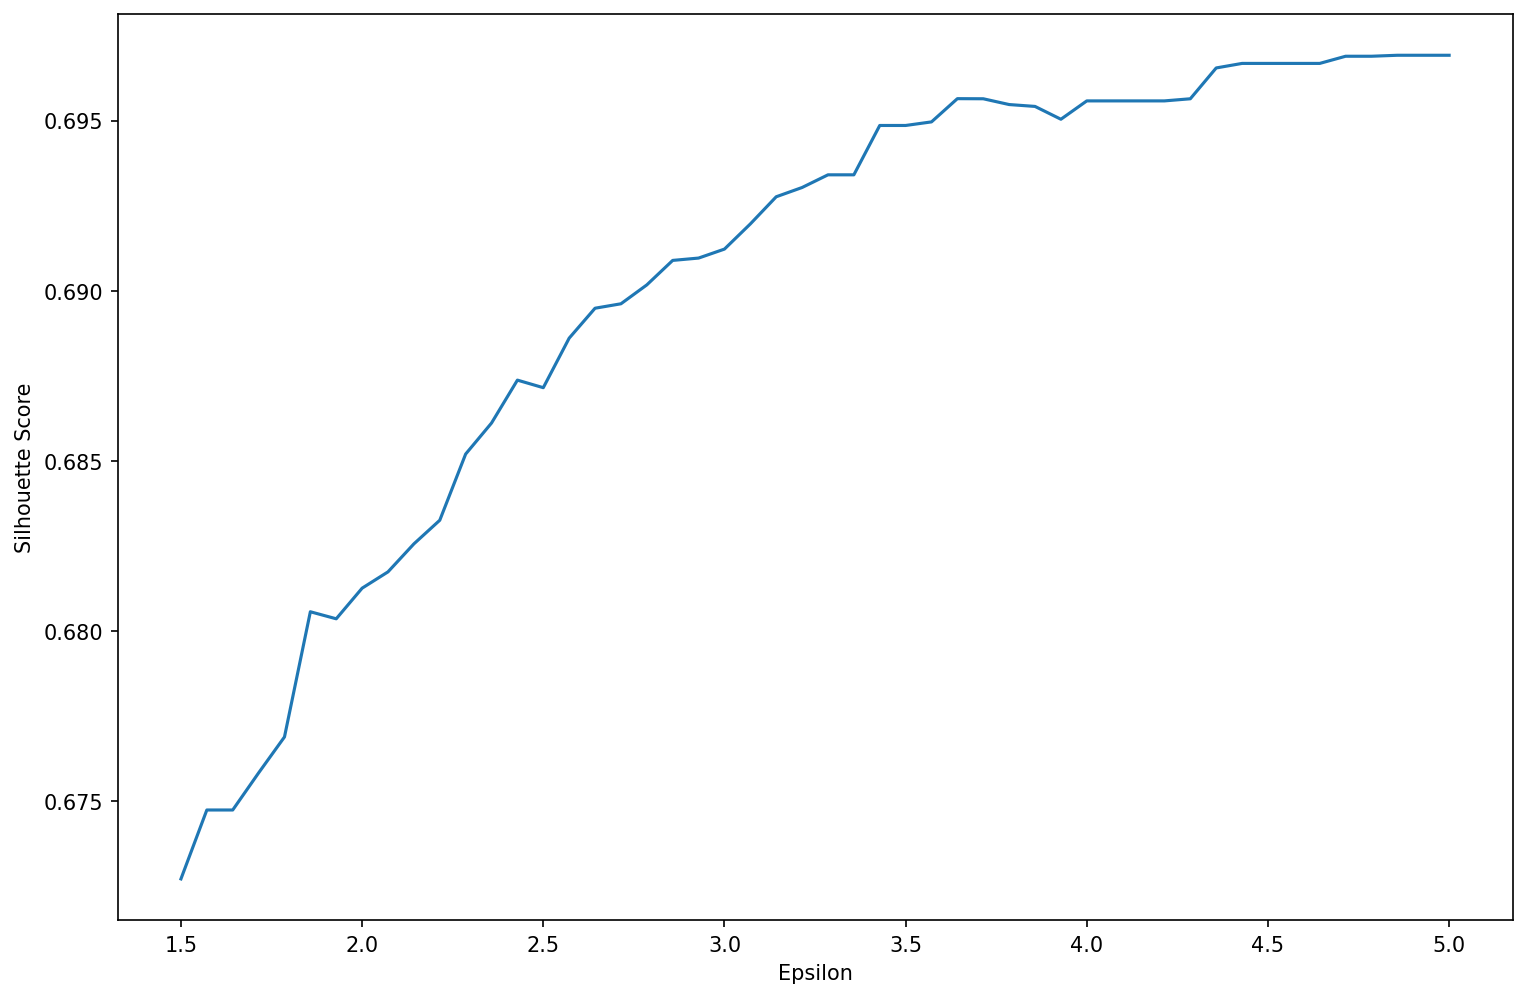

In [48]:
plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(np.linspace(1.5,5,50),silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

In [43]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    distances, indices = nbrs.kneighbors(X)                          
    distances = np.sort(distances[:,k-1], axis=0)
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    return distances[knee.knee]

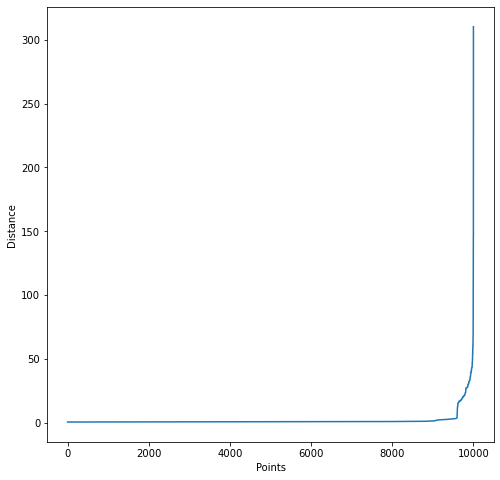

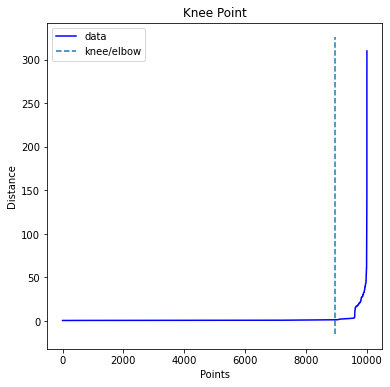

Knee Point: 1.2622153315599793


In [44]:
k = 2 * temp.shape[-1] 
x = get_kdist_plot(temp,k)
print("Knee Point:",x)

Now, let's try to find out the optimum value of min_samples hyperparameter as we have already found the best possible eps value

In [56]:
ms = np.linspace(3,min_samples,50)
silhouette_scores = []

for i in ms:
    dbscan = DBSCAN(eps=x,min_samples=int(i))
    dbscan.fit(temp)
    temp['Segment'] = dbscan.labels_
    silhouette_scores.append(silhouette_score(temp,temp.Segment))

Text(0, 0.5, 'Silhouette Score')

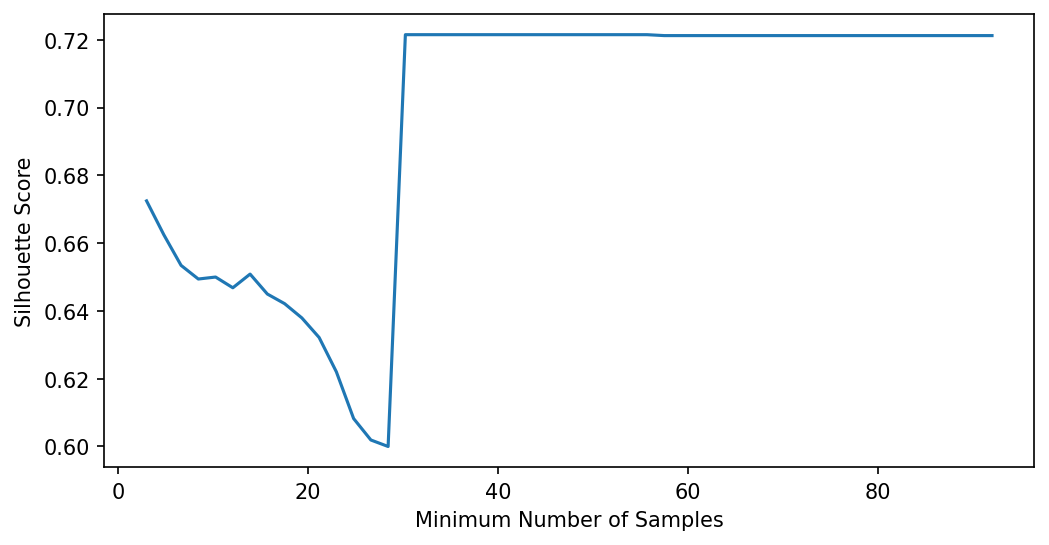

In [57]:
plt.figure(figsize=(8,4),dpi=150)
sns.lineplot(ms,silhouette_scores)
plt.xlabel('Minimum Number of Samples')
plt.ylabel('Silhouette Score')

47


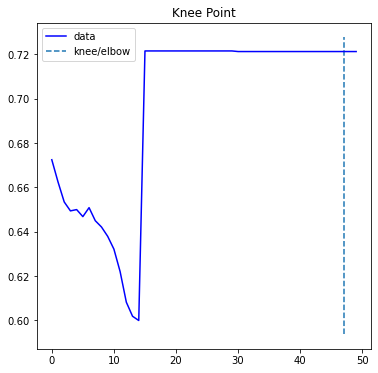

In [58]:
knee = KneeLocator(np.arange(len(silhouette_scores)), silhouette_scores, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
print(np.arange(len(silhouette_scores))[knee.knee])

In [59]:
dbscan_model = DBSCAN(eps=x,min_samples=2*min_samples)
dbscan_model.fit(temp)

DBSCAN(eps=1.2622153315599793, min_samples=184)

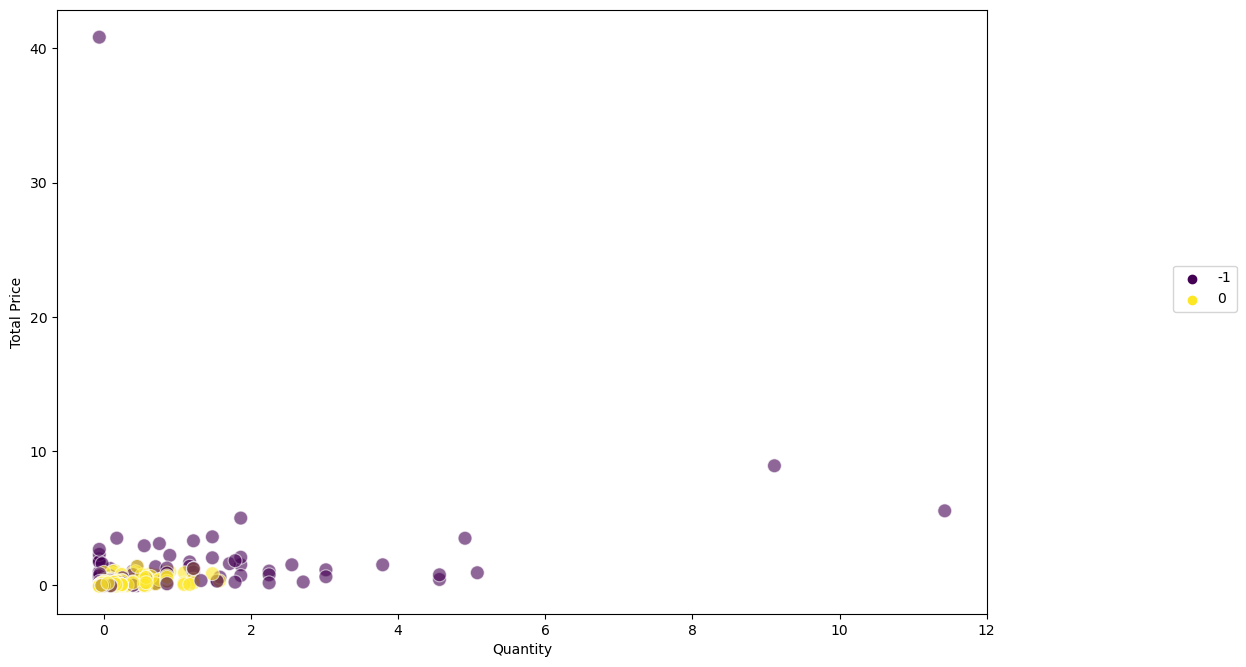

In [60]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(temp.Quantity,temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

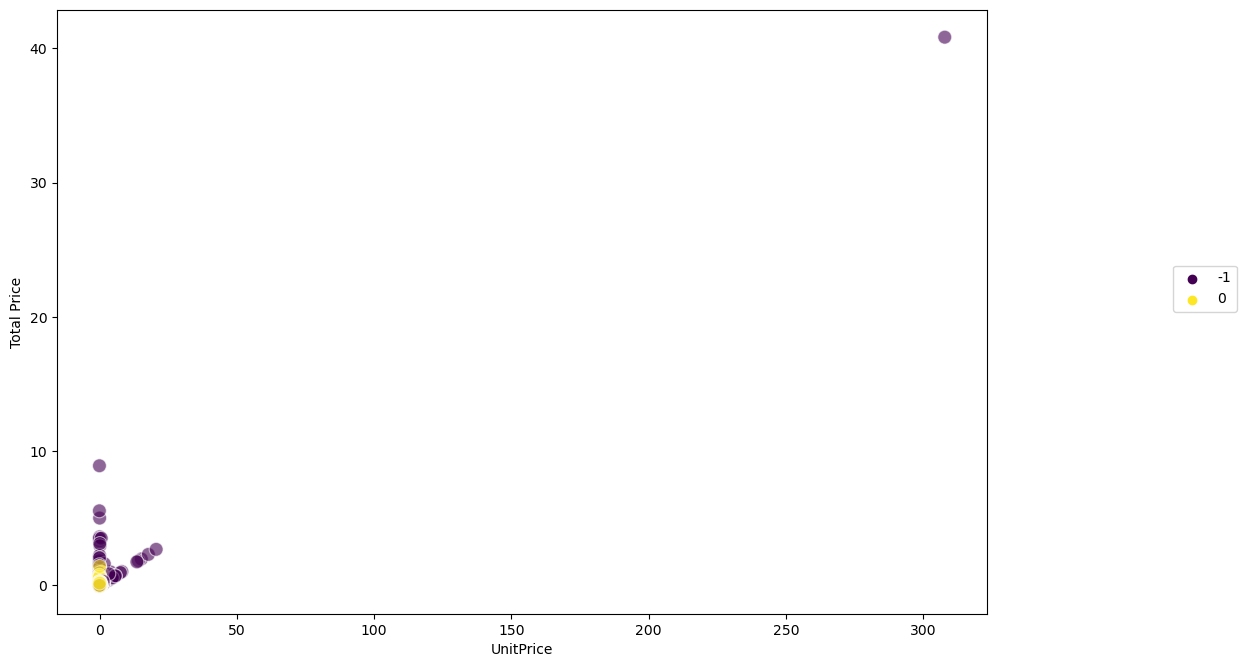

In [61]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(temp.UnitPrice,temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

In [62]:
labels = dbscan_model.labels_
print("Estimated number of cluster labels:",len(np.unique(labels)-[-1]))

Estimated number of cluster labels: 2


In [63]:
#Identify Noise
print("Percentage of noise points:",str(round(list(labels).count(-1) / len(labels) * 100,2)) + '%')

Percentage of noise points: 9.48%


In [64]:
temp['Segment'] = dbscan_model.labels_
print("Silhouette Score:",str(round(silhouette_score(temp,temp.Segment)*100,2)) + '%')

Silhouette Score: 71.75%


In [65]:
original_temp = scaler.inverse_transform(temp)
original_temp = pd.DataFrame(original_temp,columns=temp.columns)
original_temp.head()

,Description,Quantity,UnitPrice,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Segment
0,3208.0,4.0,3.95,2010.725745,10.387591,31.698502,2.407041,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,-0.037064,0.907061,-0.028152
1,1203.0,6.0,0.42,2010.725745,6.742006,22.337947,2.316137,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
2,2317.0,48.0,0.29,2011.031931,3.096420,31.698502,2.394172,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,-0.037064,0.907061,-0.028152
3,326.0,48.0,1.45,2011.261571,2.286290,22.337947,2.775314,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
4,602.0,12.0,2.95,2011.261571,3.096420,31.698502,2.541208,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841


In [66]:
original_temp['Segment'] = dbscan_model.labels_

<AxesSubplot:xlabel='Segment'>

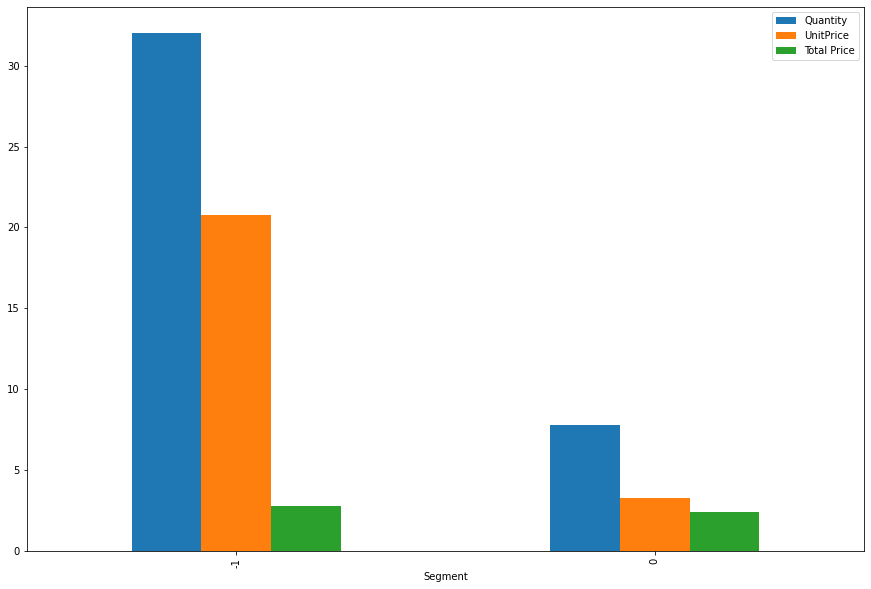

In [67]:
# plt.figure(figsize=(12,8),dpi=150)
original_temp.groupby('Segment')[['Quantity','UnitPrice','Total Price']].mean().plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='Segment', ylabel='count'>

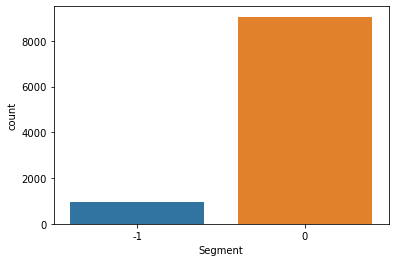

In [68]:
sns.countplot(original_temp.Segment)

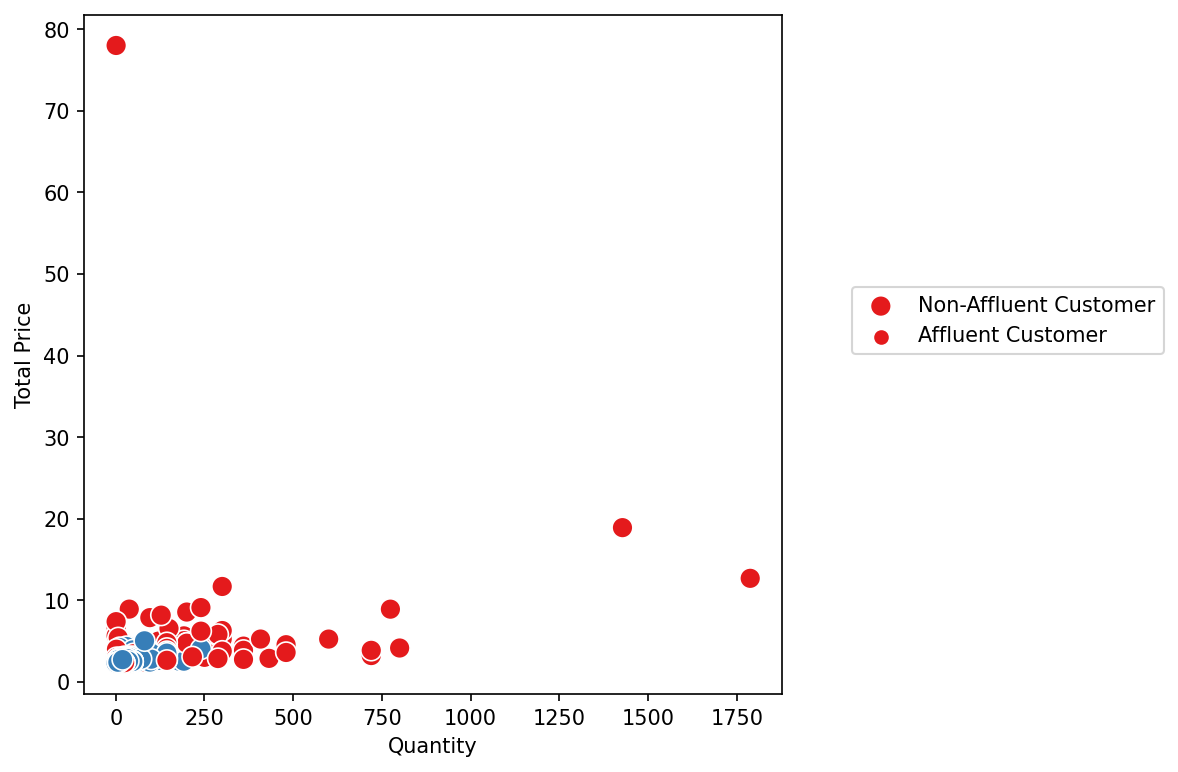

In [69]:
plt.figure(figsize=(6,6),dpi=150)
labels = ['Non-Affluent Customer','Affluent Customer']
sns.scatterplot(data=original_temp,x='Quantity',y='Total Price',hue='Segment',palette='Set1',s=100,x_jitter=0.4,y_jitter=0.5)
plt.legend(loc=(1.1,0.5),labels=labels)

The DBSCAN model has classified the customers mainly into 2 segments, first group includes the affluent and wealthy customers who spend extortionate amounts on exorbitant products whereas the second group includes substandard and penurious customers who don't have adequate financial income to afford high-quality expensive products. The first group has primarily been referred to as an outlier by the DBSCAN model considering its massive range of expenditure values with regard to quantities ordered and total price expended.